# draft

최규빈  
2023-11-10

# 1. 강의영상

# 2. Imports

# 3.

In [ ]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:10]
temp.sort()
choco = 40 + temp * 2.0 + np.random.randn(10)*3
vanilla = 60 + temp * 5.0 + np.random.randn(10)*3
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df_train = pd.concat([df1,df2])
df_train

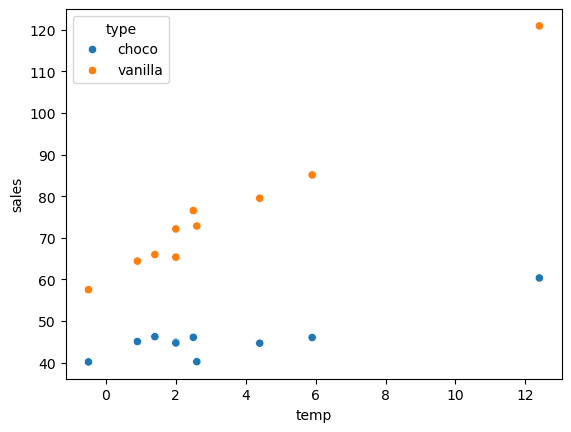

In [ ]:
sns.scatterplot(df_train,x='temp',y='sales',hue='type')

In [ ]:
X = pd.get_dummies(df_train[['temp','type']])
y = df_train.sales 

In [ ]:
predictr = sklearn.tree.DecisionTreeRegressor(random_state=7)
predictr.fit(X,y)
predictr.predict(X)

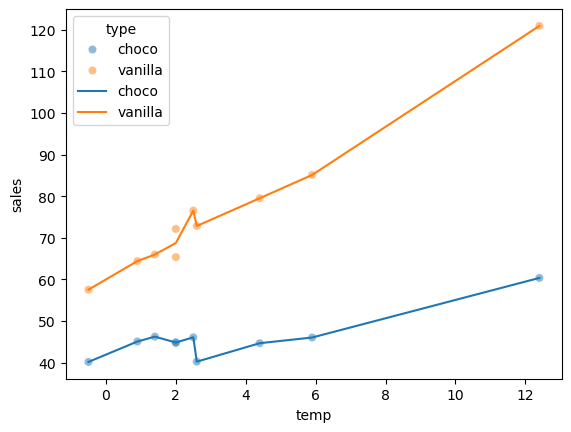

In [ ]:
df_train['sales_hat'] = predictr.predict(X)
sns.scatterplot(df_train,x='temp',y='sales',hue='type',alpha=0.5)
sns.lineplot(df_train,x='temp',y='sales_hat',hue='type')

# 1. 배깅

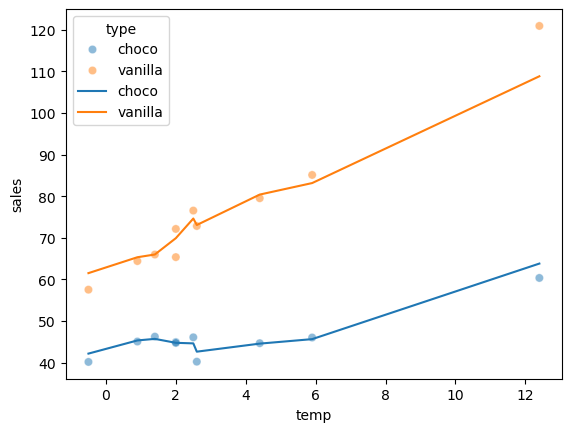

In [ ]:
predictr = sklearn.ensemble.BaggingRegressor(n_estimators=50)
predictr.fit(X,y)
df_train['sales_hat'] = predictr.predict(X)
sns.scatterplot(df_train,x='temp',y='sales',hue='type',alpha=0.5)
sns.lineplot(df_train,x='temp',y='sales_hat',hue='type')

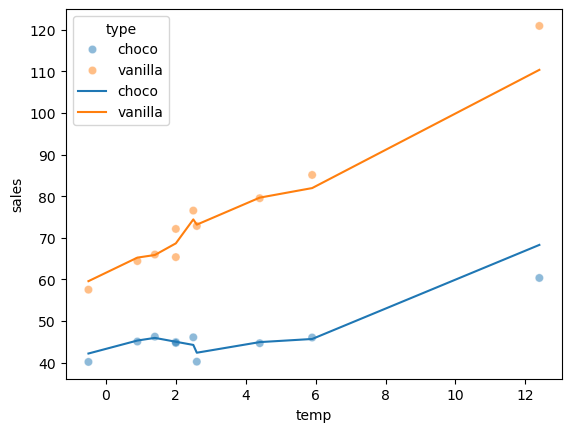

In [ ]:
predictr = sklearn.ensemble.BaggingRegressor(n_estimators=50)
predictr.fit(X,y)
df_train['sales_hat'] = predictr.predict(X)
sns.scatterplot(df_train,x='temp',y='sales',hue='type',alpha=0.5)
sns.lineplot(df_train,x='temp',y='sales_hat',hue='type')

In [ ]:
((predictr.estimators_[0].predict(X)+predictr.estimators_[1].predict(X))/2)[:10]

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names


In [ ]:
predictr.predict(X)[:10]

## 앙상블

In [ ]:
X = pd.get_dummies(df_train[['temp','type']])
y = df_train.sales 

In [ ]:
predictr = sklearn.ensemble.RandomForestRegressor(n_estimators=50)
predictr 

In [ ]:
predictr.fit(X,y)

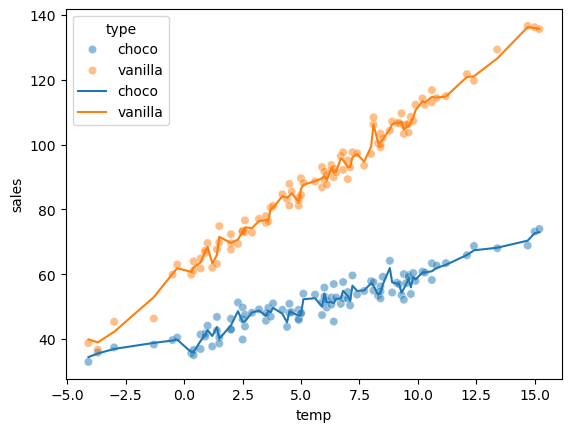

In [ ]:
df_train['sales_hat'] = predictr.predict(X)
sns.scatterplot(df_train,x='temp',y='sales',hue='type',alpha=0.5)
sns.lineplot(df_train,x='temp',y='sales_hat',hue='type')

In [ ]:
yhats = np.stack([tree.predict(np.array(X)) for tree in predictr.estimators_]).T

In [ ]:
X

In [ ]:
yhats.mean(axis=1)

In [ ]:
predictr.predict(X)

## Boosting

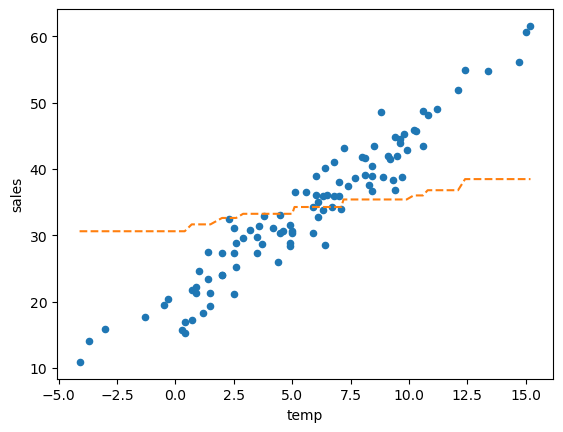

In [ ]:
X = df_train[['temp']]
y = df_train.sales 
predictr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=2)
predictr.fit(X,y)
df_train.plot.scatter(x='temp',y='sales')
plt.plot(df_train.temp,predictr.predict(X),'--',color='C1')

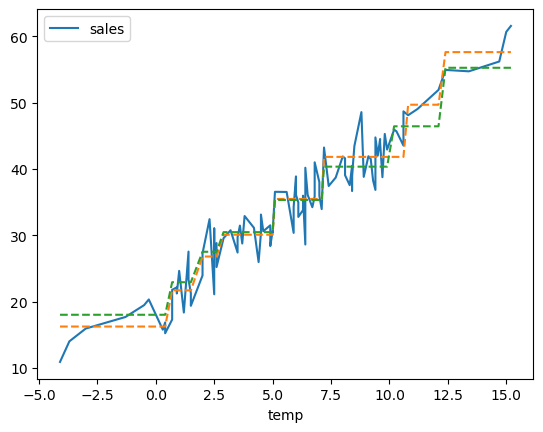

In [ ]:
df_train.plot(x='temp',y='sales')
plt.plot(df_train.temp,predictr.estimators_[0][0].predict(np.array(X))+y.mean(),'--',color='C1',)
plt.plot(df_train.temp,predictr.estimators_[1][0].predict(np.array(X))+y.mean(),'--',color='C2')
#plt.plot(df_train.temp,predictr.estimators_[2][0].predict(np.array(X))+y.mean(),'--',color='C3')

In [ ]:
yhat0 = predictr.estimators_[0][0].predict(np.array(X))*0.1
yhat1 = predictr.estimators_[1][0].predict(np.array(X))*0.1 
#yhat2 = predictr.estimators_[0][0].predict(np.array(X))*0.01 

In [ ]:
(yhat0+yhat1)+y.mean()

In [ ]:
predictr.predict(X)

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
predictr = xgb.XGBRegressor()
predictr

In [ ]:
predictr.fit(X,y)

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning:

is_sparse is deprecated and will 

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


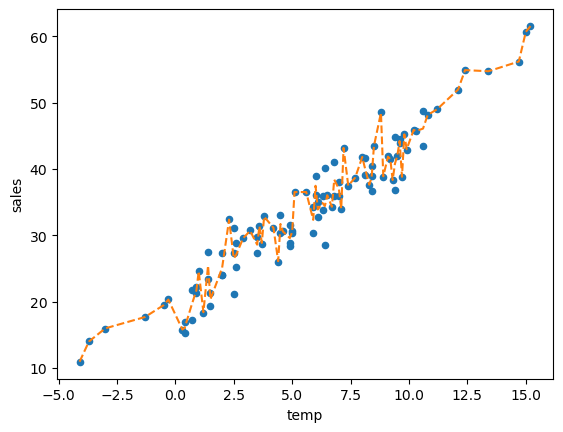

In [ ]:
df_train.plot.scatter(x='temp',y='sales')
plt.plot(df_train.temp,predictr.predict(X),'--',color='C1')

In [ ]:
predictr

In [ ]:
booster = predictr.get_booster()
booster

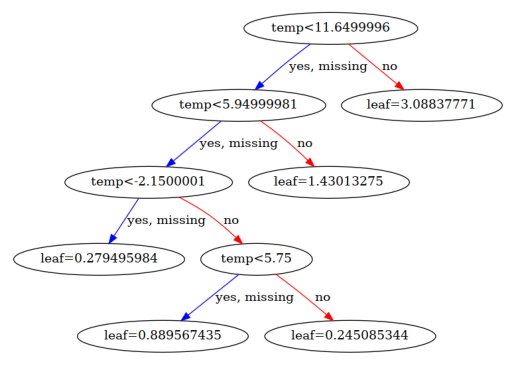

In [ ]:
xgb.plot_tree(predictr,num_trees=6)

In [ ]:
booster.trees_to_dataframe()[:20]

In [ ]:
predictr.predict(np.array(X))